
## Analysis

### Tumor Response to Treatment

_Based on Fig(1), Capomulin drug seems relatively most effective in reducing tumor volume by -19.4%, while all other drugs are showing increase in tumor growth in the treatment done for squamous cell carcinoma (SCC) at the end of 45 days treatment period. (Infubinol +46%, Ketapril +57% and Placebo +51%). It was also noticed that drug Ramicane is showing higher reduction in Tumor volume than Capomulin with -22% and so is a potential drug to compare with._ 

_So it might be beneficial to invest more time and money on research with Capomulin and Ramicane drugs to further improve the reduction in tumor volume._

### Metastatic Response to Treatment


_Based on Fig(2), there seems to be an increase in Metastatic Sites for all drugs over a period of 45 days. However, Capomulin only shows an increase of 1.5 whereas other drugs Infubinol(2.1, Ketapril(3.36) and Pacebo(3.27). It's a notable fact that, 2 other drugs Ramicane and Stelasyn are showing an increase of Metastatic sites of only 1.25 and 1.72 only even though not considered for comparative study. So it's worthwhile to do further research on Ramicane and Stelasyn as both could be potential drugs for controlling Metastic sites along with Capomulin._

_So it might be beneficial to invest more time and money on research with potential drugs like Capomulin and Ramicane to further improve the reduction in metastatic sites._

### Survival Rates

_Based on Fig(3), Capomulin shows highest survival rate with 85% whereas Infubinol(36%), Ketapril(44%) and Placebo(44%). Also another drug Ramicane is showing relatively good survival rate of 80%.  Even though there could be other contributing factors like overall health of the mice those are getting treated, pre-existing conditions etc, we don't have any data related to that._

_So it could be worthwhile to invest more time and money on research with Capomulin drug to further improve the survival rates._

### Tumor change over 45 days Treatment

_Based on the Fig(4), Capomulin shows a reduction of 19% whereas other drugs shows an increase in tumor at the end of 45 days treatment. (Infubinol +46%, Ketapril +57% and Placebo +51%). Also Ramicane which is not considred in this comparison, shows even better result with a reduction of 22%._ 

_So it might be beneficial to invest more time and money on research with Capomulin and Ramicane drugs to further improve the reduction in tumor volume._

In [32]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouseData = pd.read_csv(mouse_drug_data_to_load)
clinicalTrialData = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combinedClinicalData = mouseData.merge(clinicalTrialData, on="Mouse ID", how="left", left_index=True)
combinedClinicalData = combinedClinicalData.sort_index()

# Re-arranging columns
combinedClinicalData = combinedClinicalData[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'Drug']]

# Display the data table for preview
combinedClinicalData.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [33]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
meanTumorResponseData = combinedClinicalData.groupby(['Drug', 'Timepoint']).mean()

# Convert to DataFrame
meanTumorResponseData = meanTumorResponseData.reset_index()[['Drug', 'Timepoint', 'Tumor Volume (mm3)']]

# Preview DataFrame
meanTumorResponseData.head(6)


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528


In [34]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
semTumorVolumeData = combinedClinicalData.groupby(['Drug', 'Timepoint']).sem()

# Convert to DataFrame
semTumorVolumeData = semTumorVolumeData.reset_index()[['Drug','Timepoint', 'Tumor Volume (mm3)']]

# Preview DataFrame
semTumorVolumeData.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [35]:
# Minor Data Munging to Re-Format the Data Frames
revisedCombinedClinicalDataTumor = combinedClinicalData.pivot_table(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)', aggfunc='mean')

# Preview that Reformatting worked
revisedCombinedClinicalDataTumor.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [36]:
# Defining a Color Scheme for all plots
colorScheme = {'Capomulin': 'red', 'Infubinol' : 'blue', 'Ketapril' : 'green', 'Placebo' : 'black'}

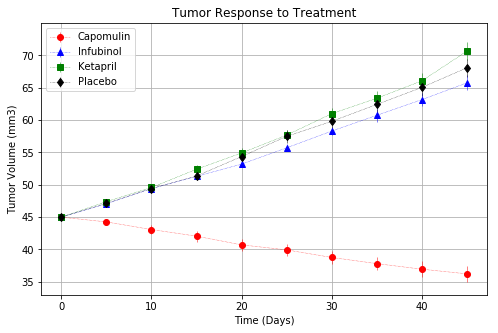

In [37]:
# Gathering the data
tumorResponseTreatmentData = revisedCombinedClinicalDataTumor[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
time = tumorResponseTreatmentData.index
treatmentTypes = tumorResponseTreatmentData.columns
yerror = semTumorVolumeData.pivot_table(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]

# Generate the Plot (with Error Bars)
# Defining the figsize and axes
fig, ax = plt.subplots(1,1,figsize=(8,5))

# Defining the yy limits and Y ticks
ax.set_ylim(33,75)
ax.set_yticks(range(35,75,5))
lW = 0.5
lS = ":"

# Plotting Errorbars
ax.errorbar(x = time, y = tumorResponseTreatmentData['Capomulin'], color = colorScheme['Capomulin'], yerr = yerror['Capomulin'] , marker = "o" , lw=lW, ls=lS)   
ax.errorbar(x = time, y = tumorResponseTreatmentData['Infubinol'], color = colorScheme['Infubinol'], yerr = yerror['Infubinol'] , marker = "^" , lw=lW, ls=lS )
ax.errorbar(x = time, y = tumorResponseTreatmentData['Ketapril'], color = colorScheme['Ketapril'], yerr = yerror['Ketapril'] , marker = "s", lw=lW, ls=lS)
ax.errorbar(x = time, y = tumorResponseTreatmentData['Placebo'], color = colorScheme['Placebo'], yerr = yerror['Placebo'] , marker = "d", lw=lW, ls=lS)

ax.grid()
ax.legend(treatmentTypes)
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title("Tumor Response to Treatment")

# Save the Figure
tumorResponseChart = plt.savefig("Images/tumorResponse2TreatmentChart.png")

# Show  the Figure
plt.show()

## Metastatic Response to Treatment

In [38]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastaticResponseTreatmentData = combinedClinicalData.groupby(['Drug', 'Timepoint']).mean()

# Convert to DataFrame
metastaticResponseTreatmentData = metastaticResponseTreatmentData[['Metastatic Sites']]

# Preview DataFrame
metastaticResponseTreatmentData.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [39]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
semMetastaticData = combinedClinicalData.groupby(['Drug', 'Timepoint']).sem()

# Convert to DataFrame
semMetastaticData = semMetastaticData[['Metastatic Sites']]

# Preview DataFrame
semMetastaticData.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [41]:
# Minor Data Munging to Re-Format the Data Frames for Metastatic Sites Data
revisedCombinedClinicalDataMetastatic = combinedClinicalData.pivot_table(index='Timepoint', columns='Drug', values='Metastatic Sites', aggfunc='mean')

# Preview that Reformatting worked
revisedCombinedClinicalDataMetastatic.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


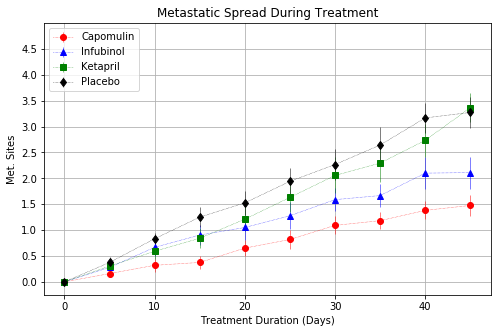

In [42]:
# Generate the Plot (with Error Bars)

# Gathering the data
metastaticResponseTreatmentData = revisedCombinedClinicalDataMetastatic[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
time = metastaticResponseTreatmentData.index
treatmentTypes = metastaticResponseTreatmentData.columns
yerror = semMetastaticData.pivot_table(index='Timepoint', columns='Drug', values='Metastatic Sites')[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]

# Generate the Plot (with Error Bars)
# Defining the figsize and axes
fig, ax = plt.subplots(1,1,figsize=(8,5))

# Defining the y limits and Y ticks
ax.set_ylim(-0.25,5)
ax.set_yticks(np.arange(0.0,5.0,0.5))
lW = 0.5
lS = ":"

# Plotting Errorbars
ax.errorbar(x = time, y = metastaticResponseTreatmentData['Capomulin'], color = colorScheme['Capomulin'], yerr = yerror['Capomulin'] , marker = "o" , lw=lW, ls=lS)   
ax.errorbar(x = time, y = metastaticResponseTreatmentData['Infubinol'], color = colorScheme['Infubinol'], yerr = yerror['Infubinol'] , marker = "^" , lw=lW, ls=lS )
ax.errorbar(x = time, y = metastaticResponseTreatmentData['Ketapril'], color = colorScheme['Ketapril'], yerr = yerror['Ketapril'] , marker = "s", lw=lW, ls=lS)
ax.errorbar(x = time, y = metastaticResponseTreatmentData['Placebo'], color = colorScheme['Placebo'], yerr = yerror['Placebo'] , marker = "d", lw=lW, ls=lS)

ax.grid()
ax.legend(treatmentTypes, loc="upper left")
ax.set_xlabel("Treatment Duration (Days)")
ax.set_ylabel("Met. Sites")
ax.set_title("Metastatic Spread During Treatment")
# Save the Figure

metastaticSpreadChart = plt.savefig("Images/metastaticSpread2TreatmentChart.png")

# Show  the Figure
plt.show()

## Survival Rates

In [43]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survivalRatesData = combinedClinicalData.groupby(['Drug', 'Timepoint']).count()

# Convert to DataFrame
survivalRatesData = survivalRatesData.reset_index()[['Drug', 'Timepoint', 'Mouse ID']]
survivalRatesData.rename(columns={'Mouse ID': 'Mouse Count'},inplace=True)

# Preview DataFrame
survivalRatesData.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [44]:
# Minor Data Munging to Re-Format the Data Frames for Mouse Survival Rate
mouseSurvivalData = survivalRatesData.pivot_table(index='Timepoint', columns='Drug', values='Mouse Count')

# Preview that Reformatting worked
mouseSurvivalData.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


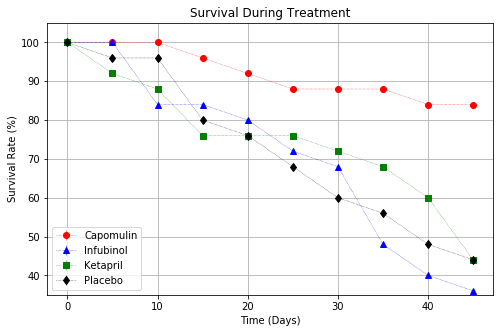

In [45]:
# Generate the Plot (Accounting for percentages)

# Gathering the data
mouseSurvivalData = mouseSurvivalData[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
mouseTotal = mouseSurvivalData.loc[0,:]

# Converting values to percentages
mouseSurvivalData = ( mouseSurvivalData / mouseTotal ) * 100

# Setting Plot X tick labels
time = mouseSurvivalData.index

# Setting Plot Legend Label Values
treatmentTypes = mouseSurvivalData.columns

# Filling error values with 0 as this is not a mean but count
yerror = survivalRatesData.pivot_table(index='Timepoint', columns='Drug', values='Mouse Count')[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']] * 0

# Generate the Plot
# Defining the figsize and axes
fig, ax = plt.subplots(1,1,figsize=(8,5))

# Defining the y limits and Y ticks
ax.set_ylim(35,105)
ax.set_yticks(np.arange(40,110,10))
lW = 0.5
lS = ":"

# Plotting Errorbars
ax.errorbar(x = time, y = mouseSurvivalData['Capomulin'], color = colorScheme['Capomulin'], yerr = yerror['Capomulin'] , marker = "o" , lw=lW, ls=lS)   
ax.errorbar(x = time, y = mouseSurvivalData['Infubinol'], color = colorScheme['Infubinol'], yerr = yerror['Infubinol'] , marker = "^" , lw=lW, ls=lS )
ax.errorbar(x = time, y = mouseSurvivalData['Ketapril'], color = colorScheme['Ketapril'], yerr = yerror['Ketapril'] , marker = "s", lw=lW, ls=lS)
ax.errorbar(x = time, y = mouseSurvivalData['Placebo'], color = colorScheme['Placebo'], yerr = yerror['Placebo'] , marker = "d", lw=lW, ls=lS)

ax.grid()
ax.legend(treatmentTypes, loc="lower left")
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Survival Rate (%)")
ax.set_title("Survival During Treatment")

# Save the Figure
survivalRateChart = plt.savefig("Images/survivalDuringTreatmentChart.png")

# Show  the Figure
plt.show()


## Summary Bar Graph

In [46]:
# Calculate the percent changes for each drug

tumorSummaryData = combinedClinicalData.groupby(['Drug', 'Timepoint']).mean()[['Tumor Volume (mm3)']].reset_index()
tumorSummaryData = tumorSummaryData[['Drug', 'Tumor Volume (mm3)']]
drug = []
perc = []
for i in np.arange(0,100,10):
     drug.append(tumorSummaryData["Drug"].iloc[i])
     perc.append((tumorSummaryData.iloc[i+9,1] - tumorSummaryData.iloc[i,1]) / tumorSummaryData.iloc[i,1]  * 100)


tumorSummaryDataPerc = pd.DataFrame({"Drug" : drug,
                                     "Percent": perc},dtype = "float64").set_index(['Drug'])
print(tumorSummaryDataPerc.iloc[:,0])


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
Name: Percent, dtype: float64


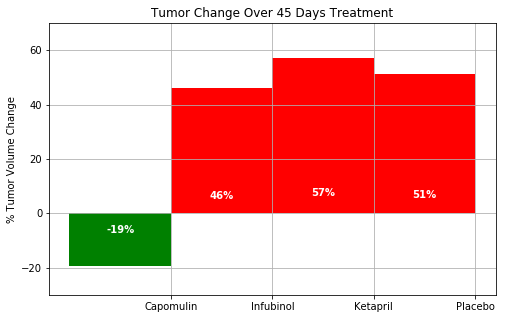

In [47]:
# Store all Relevant Percent Changes 

percentData = tumorSummaryDataPerc.iloc[[0,2,3,5],0]
percentData = percentData.reset_index()
percentData.set_index("Drug", inplace=True)

# Splice the data between passing and failing drugs
pos = percentData.iloc[:,0]>0
percentData['Positive'] = pos

# Plotting the bar graph
fig, ax = plt.subplots(1,1,figsize=(8,5))

# Orient widths. Add labels, tick marks, etc. 
ind = np.arange(len(percentData))  # the x locations for the groups
width = 1

ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Days Treatment')
ax.set_ylim(-30, 70)
ax.set_yticks(np.arange(-20,65,20))
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(percentData.index)

bar1 = ax.bar(ind, percentData["Percent"], width, color=percentData["Positive"].map({True: 'r', False: 'g'}))
plt.grid()

# Use functions to label the percentages of changes
def autolabel(bars,ax):
    """
    Arguments : List of bar containers, axes 
    Return : None
    Usage:  Attach a text label at the bottom inside each bar displaying its height
    """
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width()/2., 0.1*height,
                f'{height:.0f}%',
                ha='center', va='bottom' ,color="white", fontweight = "bold")
        else:
            ax.text(bar.get_x() + bar.get_width()/2., 0.4*height,
                f'{height:.0f}%',
                ha='center', va='bottom' ,color="white", fontweight = "bold")
            
# Call functions to implement the function calls
autolabel(bar1, ax)

# Save the Figure
tumorChange45Days = plt.savefig("Images/tumorChange45Days.png")

# Show the Figure
plt.show()